In [19]:
# Import package
import yfinance as yf
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#maybe
from pandas_datareader import data as pdr

In [20]:
#Define start and end date
start = "2017-01-01"
today = dt.datetime.today()

# Get the data
data = yf.download(tickers='PFE', start=start,end=today, interval='1d')

# Print the data
print(data.head())
print(data.tail())

[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2017-01-03  31.024668  31.309298  30.920303  31.309298  25.928757  23391844
2017-01-04  31.432638  31.641365  31.337761  31.584440  26.156612  22753963
2017-01-05  31.660341  31.963947  31.423149  31.888046  26.408043  21083584
2017-01-06  31.935484  31.973434  31.631880  31.764706  26.305902  18418228
2017-01-09  31.717268  31.944971  31.669828  31.755219  26.298046  21559886
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2021-12-28  59.049999  59.450001  57.080002  58.009998  58.009998  36901700
2021-12-29  57.310001  58.029999  57.070000  57.580002  57.580002  26170200
2021-12-30  57.750000  58.740002  57.529999  58.400002  58.400002  24559000
2021-12-31  58.5299

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1260 entries, 2017-01-03 to 2022-01-03
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1260 non-null   float64
 1   High       1260 non-null   float64
 2   Low        1260 non-null   float64
 3   Close      1260 non-null   float64
 4   Adj Close  1260 non-null   float64
 5   Volume     1260 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.9 KB


In [22]:
data.shape

(1260, 6)

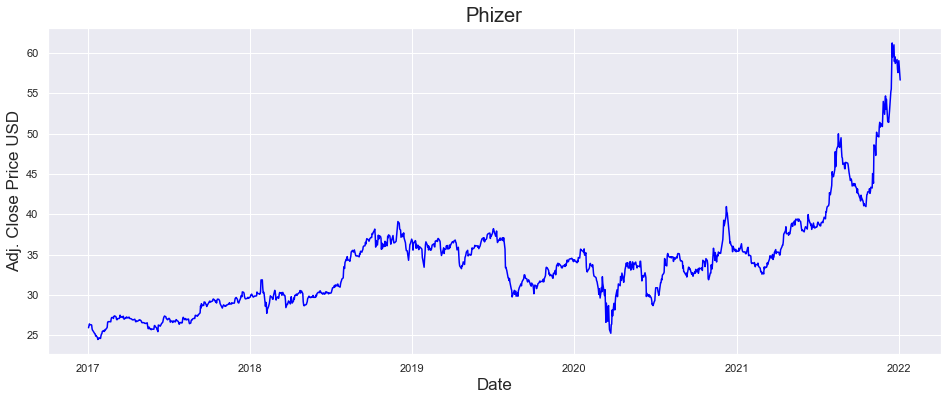

In [23]:
#Development for the Phizer stock

#Plotting the model
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(data['Adj Close'],color = "blue")
plt.xlabel('Date', fontsize=17)
plt.ylabel('Adj. Close Price USD', fontsize=17)
plt.title ('Phizer', fontsize=20)
plt.show()

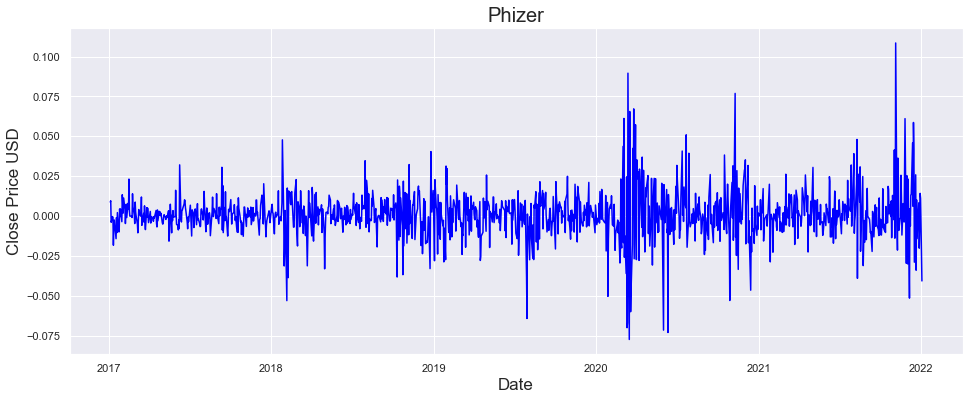

In [24]:
# Create a column with the percentual change with regards to the day before.
data['Daily Return'] = data["Adj Close"].pct_change()

#Plotting the model
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(data['Daily Return'],color = "blue")
plt.xlabel('Date', fontsize=17)
plt.ylabel('Close Price USD', fontsize=17)
plt.title ('Phizer', fontsize=20)
plt.show()

In [25]:
#Save the data to a file for further development
data.to_csv('I:\python_file\save\M4 (1)\Stock data\Phizer.csv')

In [26]:
test_list = []
if not test_list == True:
    print(1)
else: print(2)

1


In [27]:
signal_strenght = 0.01
first_buy = []
positive = []
signal_list = []
for x in data['Daily Return']:
    if x > signal_strenght:
        s_list = 1
        signal_list.append(s_list)
            
    elif -signal_strenght <= x <= signal_strenght:
        s_list = 0
        signal_list.append(s_list)
    else:
        s_list = -1
        signal_list.append(s_list)
        
data_signal = data.copy()
data_signal['Signal'] = signal_list

In [28]:
data_signal = data_signal.iloc[1: , :]
data_signal

,Open,High,Low,Close,Adj Close,Volume,Daily Return,Signal
Date,,,,,,,,
2017-01-04,31.432638,31.641365,31.337761,31.584440,26.156612,22753963,0.008788,0
2017-01-05,31.660341,31.963947,31.423149,31.888046,26.408043,21083584,0.009613,0
2017-01-06,31.935484,31.973434,31.631880,31.764706,26.305902,18418228,-0.003868,0
2017-01-09,31.717268,31.944971,31.669828,31.755219,26.298046,21559886,-0.000299,0
2017-01-10,31.869070,31.935484,31.612904,31.726755,26.274475,20444754,-0.000896,0
...,...,...,...,...,...,...,...,...
2021-12-28,59.049999,59.450001,57.080002,58.009998,58.009998,36901700,-0.020101,-1
2021-12-29,57.310001,58.029999,57.070000,57.580002,57.580002,26170200,-0.007412,0
2021-12-30,57.750000,58.740002,57.529999,58.400002,58.400002,24559000,0.014241,1


In [29]:
data_signal.Signal.value_counts()

 0    825
 1    228
-1    206
Name: Signal, dtype: int64

In [30]:
data_signal.to_csv(r'I:\python_file\save\M4 (1)\Stock data\Phizer_signal.csv')